# SVM Digits from MNIST with Scikit-Learn

### On commence par importer les bibliothèques utilisées par notre notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

### On ouvre les csv avec pandas

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test =  pd.read_csv("data/test.csv")
df_sample_submission =  pd.read_csv("data/sample_submission.csv")

### On regarde les infos des différents datasets

Ici nous avons 3 datasets :
- train.csv : contient les données d'entrainement avec les champs suivants :
  - 'label' : le chiffre correspondant à l'observation
  - 'pixel0' -> 'pixel783' : l'information de coloration de chaque pixel de l'image à analyser, entre 0 et 255.
- test.csv : les données de test qu'il va falloir trouver. Ce dataset ne contient pas, de base, le champs label.
- sample_submission.csv : un exemple de csv pour la soumission sur Kaggle du résultat.

On peut voir que les images, qui sont de taille 28x28, ont étées _applaties_ pour rentrer dans une ligne, ainsi les différentes lignes de l'images sont placées les unes à la suite des autres pour former ces 784 colonnes. 

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Au niveau des types de données, le jeu de donnée d'entrainement est essentiellement composé d'entiers int64, tout comme le jeu de test.

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


On va tester s'il y a des valeurs nulles.

In [6]:
for i in df_train.columns:
    if df_train[i].isna().sum():
        print(i)

Aucune valeur nulle dans le jeu d'entrainement.

In [7]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


On constate qu'il y a beaucoup de colonnes sans valeur. On va les effacer pour optimiser les calculs.

In [9]:
df_train.drop(df_train.loc[:, np.mean(df_train, axis=0) == 0.0], axis=1, inplace=True)

In [10]:
df_train.describe()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
count,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000
mean,4.456643,0.00300,0.011190,0.005143,0.000214,0.000381,0.001310,0.010548,0.027262,0.050905,...,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857
std,2.887730,0.56812,1.626927,1.053972,0.043916,0.078072,0.232634,1.131661,2.310396,3.121847,...,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,9.000000,116.00000,254.000000,216.000000,9.000000,16.000000,47.000000,157.000000,254.000000,255.000000,...,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000


On compte le nombre de labels différents

In [11]:
df_train.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

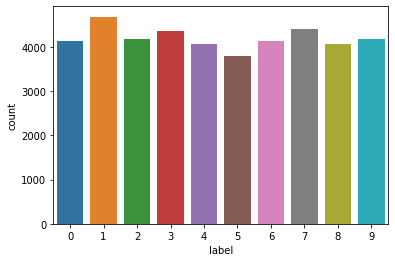

In [12]:
sns.countplot(x='label', data=df_train)

### Construction du modèle

In [13]:
X = df_train.drop('label', axis=1)
y = df_train['label']

On va utiliser un standard scaler pour normaliser les données

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

On split le jeu d'entrainement.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

On commence par utiliser un classifier sans paramètre, non optimisé.

In [16]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Support Vector Machine")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix\n", conf_matrix)

Support Vector Machine
Accuracy: 0.9588095238095238
Confusion Matrix
 [[801   0   3   0   1   3   7   0   1   0]
 [  0 892   9   1   1   1   1   1   2   1]
 [  2   6 820   3   4   0   4   2   5   0]
 [  1   3  12 884   0  11   0   9  12   5]
 [  1   0  11   0 805   1   5   4   0  12]
 [  2   1   8  14   1 663  10   1   2   0]
 [  5   1  11   0   0   6 760   0   2   0]
 [  0   2  11   3   5   2   0 855   1  14]
 [  1   4   9  10   4   8   4   2 791   2]
 [  2   2   6  12   7   3   0  19   4 783]]


Le score est bon sur le jeu d'entrainement, on va voir sur le jeu de test.

On fait attention à dropper les colonnes qui ne sont pas nécessaires, comme on l'a vu précédemment car elles avaient une moyenne à 0.

In [26]:
ypred_test = svm_classifier.predict(df_test[df_train.columns.drop('label')])

print(ypred_test)

C:\Anaconda3\envs\SVM-Digits\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[2 2 2 ... 2 2 2]


In [27]:
df_sample_submission.loc[:, 'Label'] = [int(x) for x in ypred_test]
df_sample_submission.to_csv('submission_jean.csv', index=False)

![Score sans optimisation](submission_results/score_jean_01.png)

On peut voir que le résultat est très mauvais, comme prévu. Le modèle est en overfitting.

### Essai 2 : on va optimiser un peu le SVC

On met C = 1, c'est le défaut :
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

Et on utilise le kernel 'linear' cette fois, plutôt que le défaut 'rbf'

In [29]:
svm_classifier = SVC(C=1, kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Support Vector Machine")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix\n", conf_matrix)

Support Vector Machine
Accuracy: 0.9205952380952381
Confusion Matrix
 [[793   0   1   2   2   7   8   0   3   0]
 [  0 896   4   0   1   1   1   1   5   0]
 [  6  17 772  12  10   5   9   6   8   1]
 [  4   3  26 833   1  35   0   7  21   7]
 [  3   3  10   0 787   2   8   4   0  22]
 [  5   3   5  32  11 618   8   0  16   4]
 [ 11   2   8   0   5  11 746   0   2   0]
 [  1   4  12  10  15   0   0 821   5  25]
 [  6  12  10  37   7  21   6   4 727   5]
 [  1   2   6  14  31   7   0  28   9 740]]


In [31]:
ypred_test = svm_classifier.predict(df_test[df_train.columns.drop('label')])

print(ypred_test)

C:\Anaconda3\envs\SVM-Digits\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[2 0 8 ... 3 9 2]


In [32]:
df_sample_submission.loc[:, 'Label'] = [int(x) for x in ypred_test]
df_sample_submission.to_csv('submission_jean2.csv', index=False)

![Scores après optimisation légère](submission_results/score_jean_02.png)

On constate que le simple changement de kernel, en passant de rbf à linear a amélioré notre score.